# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [1]:
### Import required libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('marketing.csv')

# Display the first 5 rows
print(df.head(5))

# Check the shape of the dataset
print("Shape:", df.shape)

# Check the info of the dataset
print("Info:")
print(df.info())


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome   
0  5524        1957  Graduation         Single  58138.0        0         0  \
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases   
0    4/9/2012       58       635  ...                   10                  4  \
1    8/3/2014       38        11  ...                    1                  2   
2  21-08-2013       26       426  ...                    2                 10   
3   10/2/2014       26        11  ...                    0                  4   
4  19-01-2014       94       173  ...                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  Accepted

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [3]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('marketing.csv')

# Check the percentage of missing values
missing_percentages = df.isnull().mean() * 100

# Display the missing percentages
print("Missing Value Percentages:")
print(missing_percentages)

Missing Value Percentages:
ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64


### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [4]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('marketing.csv')

# Check for duplicate records
duplicates = df.duplicated()

# Count the number of duplicate records
num_duplicates = duplicates.sum()

# Display the number of duplicate records
print("Number of Duplicate Records:", num_duplicates)

# Drop the duplicate records (if any)
df.drop_duplicates(inplace=True)

# Verify if duplicates were dropped
print("Number of Records after Dropping Duplicates:", len(df))


Number of Duplicate Records: 0
Number of Records after Dropping Duplicates: 2240


### 5. Drop the columns which you think redundant for the analysis 

In [5]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('marketing.csv')

# Check the column names
columns = df.columns

# Print the column names
print("Column Names:")
print(columns)


Column Names:
Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')


In [6]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('marketing.csv')

# List of redundant columns to drop
redundant_columns = ['ID', 'Dt_Customer']

# Drop the redundant columns
df.drop(columns=redundant_columns, inplace=True)

# Verify the updated DataFrame
print(df.head())


   Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  Recency   
0        1957  Graduation         Single  58138.0        0         0       58  \
1        1954  Graduation         Single  46344.0        1         1       38   
2        1965  Graduation       Together  71613.0        0         0       26   
3        1984  Graduation       Together  26646.0        1         0       26   
4        1981         PhD        Married  58293.0        1         0       94   

   MntWines  MntFruits  MntMeatProducts  ...  NumCatalogPurchases   
0       635         88              546  ...                   10  \
1        11          1                6  ...                    1   
2       426         49              127  ...                    2   
3        11          4               20  ...                    0   
4       173         43              118  ...                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4   
0                  4       

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [7]:
import pandas as pd



# Check the unique categories in 'Marital_Status'
unique_categories = df['Marital_Status'].unique()

# Print the unique categories
print("Unique Categories in 'Marital_Status':")
print(unique_categories)

# Group categories 'Married' and 'Together' as 'relationship'
df['Marital_Status'].replace(['Married', 'Together'], 'relationship', inplace=True)

# Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'
df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 'Single', inplace=True)

# Verify the updated 'Marital_Status' column
print("\nUpdated 'Marital_Status' Column:")
print(df['Marital_Status'].unique())


Unique Categories in 'Marital_Status':
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']

Updated 'Marital_Status' Column:
['Single' 'relationship']


### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [8]:
import pandas as pd



# Define the columns to be grouped
columns_to_group = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Create the 'Total_Expenses' column as the sum of the grouped columns
df['Total_Expenses'] = df[columns_to_group].sum(axis=1)

# Verify the updated DataFrame with the new 'Total_Expenses' column
print(df.head())


   Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  Recency   
0        1957  Graduation         Single  58138.0        0         0       58  \
1        1954  Graduation         Single  46344.0        1         1       38   
2        1965  Graduation   relationship  71613.0        0         0       26   
3        1984  Graduation   relationship  26646.0        1         0       26   
4        1981         PhD   relationship  58293.0        1         0       94   

   MntWines  MntFruits  MntMeatProducts  ...  NumStorePurchases   
0       635         88              546  ...                  4  \
1        11          1                6  ...                  2   
2       426         49              127  ...                 10   
3        11          4               20  ...                  4   
4       173         43              118  ...                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1   
0                  7          

### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [9]:
import pandas as pd



# Define the columns to be grouped
columns_to_group = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']

# Create the 'Num_Total_Purchases' column as the sum of the grouped columns
df['Num_Total_Purchases'] = df[columns_to_group].sum(axis=1)

# Verify the updated DataFrame with the new 'Num_Total_Purchases' column
print(df.head())


   Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  Recency   
0        1957  Graduation         Single  58138.0        0         0       58  \
1        1954  Graduation         Single  46344.0        1         1       38   
2        1965  Graduation   relationship  71613.0        0         0       26   
3        1984  Graduation   relationship  26646.0        1         0       26   
4        1981         PhD   relationship  58293.0        1         0       94   

   MntWines  MntFruits  MntMeatProducts  ...  NumWebVisitsMonth  AcceptedCmp3   
0       635         88              546  ...                  7             0  \
1        11          1                6  ...                  5             0   
2       426         49              127  ...                  4             0   
3        11          4               20  ...                  6             0   
4       173         43              118  ...                  5             0   

   AcceptedCmp4  AcceptedC

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [10]:
import pandas as pd



# Create the 'Kids' column as the sum of 'Kidhome' and 'Teenhome'
df['Kids'] = df['Kidhome'] + df['Teenhome']

# Verify the updated DataFrame with the new 'Kids' column
print(df.head())


   Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  Recency   
0        1957  Graduation         Single  58138.0        0         0       58  \
1        1954  Graduation         Single  46344.0        1         1       38   
2        1965  Graduation   relationship  71613.0        0         0       26   
3        1984  Graduation   relationship  26646.0        1         0       26   
4        1981         PhD   relationship  58293.0        1         0       94   

   MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp3  AcceptedCmp4   
0       635         88              546  ...             0             0  \
1        11          1                6  ...             0             0   
2       426         49              127  ...             0             0   
3        11          4               20  ...             0             0   
4       173         43              118  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  R

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [11]:
import pandas as pd


# Define the columns to be grouped
columns_to_group = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# Create the 'TotalAcceptedCmp' column as the sum of the grouped columns
df['TotalAcceptedCmp'] = df[columns_to_group].sum(axis=1)

# Verify the updated DataFrame with the new 'TotalAcceptedCmp' column
print(df.head())


   Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  Recency   
0        1957  Graduation         Single  58138.0        0         0       58  \
1        1954  Graduation         Single  46344.0        1         1       38   
2        1965  Graduation   relationship  71613.0        0         0       26   
3        1984  Graduation   relationship  26646.0        1         0       26   
4        1981         PhD   relationship  58293.0        1         0       94   

   MntWines  MntFruits  MntMeatProducts  ...  AcceptedCmp4  AcceptedCmp5   
0       635         88              546  ...             0             0  \
1        11          1                6  ...             0             0   
2       426         49              127  ...             0             0   
3        11          4               20  ...             0             0   
4       173         43              118  ...             0             0   

   AcceptedCmp1  AcceptedCmp2  Complain  Response  Total

### 11. Drop those columns which we have used above for obtaining new features

In [12]:
import pandas as pd



# Define the columns to drop
columns_to_drop = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                   'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                   'NumDealsPurchases', 'Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2',
                   'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# Drop the columns
df.drop(columns=columns_to_drop, inplace=True)

# Verify the updated DataFrame
print(df.head())


   Year_Birth   Education Marital_Status   Income  Recency  NumWebVisitsMonth   
0        1957  Graduation         Single  58138.0       58                  7  \
1        1954  Graduation         Single  46344.0       38                  5   
2        1965  Graduation   relationship  71613.0       26                  4   
3        1984  Graduation   relationship  26646.0       26                  6   
4        1981         PhD   relationship  58293.0       94                  5   

   Complain  Total_Expenses  Num_Total_Purchases  Kids  TotalAcceptedCmp  
0         0            1617                   25     0                 1  
1         0              27                    6     2                 0  
2         0             776                   21     0                 0  
3         0              53                    8     1                 0  
4         0             422                   19     1                 0  


In [13]:
df.shape

(2240, 11)

### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [14]:
import pandas as pd



# Extract 'age' from 'Year_Birth'
df['age'] = pd.Timestamp('now').year - df['Year_Birth']

# Drop the 'Year_Birth' column
df.drop(columns=['Year_Birth'], inplace=True)

# Verify the updated DataFrame
print(df.head())


    Education Marital_Status   Income  Recency  NumWebVisitsMonth  Complain   
0  Graduation         Single  58138.0       58                  7         0  \
1  Graduation         Single  46344.0       38                  5         0   
2  Graduation   relationship  71613.0       26                  4         0   
3  Graduation   relationship  26646.0       26                  6         0   
4         PhD   relationship  58293.0       94                  5         0   

   Total_Expenses  Num_Total_Purchases  Kids  TotalAcceptedCmp  age  
0            1617                   25     0                 1   66  
1              27                    6     2                 0   69  
2             776                   21     0                 0   58  
3              53                    8     1                 0   39  
4             422                   19     1                 0   42  


### 13. Encode the categorical variables in the dataset

In [15]:
import pandas as pd



# Encode categorical variables using get_dummies()
df_encoded = pd.get_dummies(df)

# Verify the encoded DataFrame
print(df_encoded.head())


    Income  Recency  NumWebVisitsMonth  Complain  Total_Expenses   
0  58138.0       58                  7         0            1617  \
1  46344.0       38                  5         0              27   
2  71613.0       26                  4         0             776   
3  26646.0       26                  6         0              53   
4  58293.0       94                  5         0             422   

   Num_Total_Purchases  Kids  TotalAcceptedCmp  age  Education_2n Cycle   
0                   25     0                 1   66               False  \
1                    6     2                 0   69               False   
2                   21     0                 0   58               False   
3                    8     1                 0   39               False   
4                   19     1                 0   42               False   

   Education_Basic  Education_Graduation  Education_Master  Education_PhD   
0            False                  True             False     

### 14. Standardize the columns, so that values are in a particular range

In [16]:
# Verify the current columns in the DataFrame
print(df.head())


    Education Marital_Status   Income  Recency  NumWebVisitsMonth  Complain   
0  Graduation         Single  58138.0       58                  7         0  \
1  Graduation         Single  46344.0       38                  5         0   
2  Graduation   relationship  71613.0       26                  4         0   
3  Graduation   relationship  26646.0       26                  6         0   
4         PhD   relationship  58293.0       94                  5         0   

   Total_Expenses  Num_Total_Purchases  Kids  TotalAcceptedCmp  age  
0            1617                   25     0                 1   66  
1              27                    6     2                 0   69  
2             776                   21     0                 0   58  
3              53                    8     1                 0   39  
4             422                   19     1                 0   42  


In [17]:
import pandas as pd



# Identify the numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Print the numeric columns
print("Numeric Columns:")
print(numeric_columns)




Numeric Columns:
Index(['Income', 'Recency', 'NumWebVisitsMonth', 'Complain', 'Total_Expenses',
       'Num_Total_Purchases', 'Kids', 'TotalAcceptedCmp', 'age'],
      dtype='object')


In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Identify the numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the range for each numeric column
column_ranges = df[numeric_columns].max() - df[numeric_columns].min()

# Specify a threshold for range difference to determine columns to be standardized
range_threshold = 100

# Identify columns with a range above the threshold
columns_to_standardize = column_ranges[column_ranges > range_threshold].index.tolist()

# Create a StandardScaler object
scaler = StandardScaler()

# Standardize the selected columns
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# Verify the standardized DataFrame
print(df.head())


    Education Marital_Status    Income  Recency  NumWebVisitsMonth  Complain   
0  Graduation         Single  0.234063       58                  7         0  \
1  Graduation         Single -0.234559       38                  5         0   
2  Graduation   relationship  0.769478       26                  4         0   
3  Graduation   relationship -1.017239       26                  6         0   
4         PhD   relationship  0.240221       94                  5         0   

   Total_Expenses  Num_Total_Purchases  Kids  TotalAcceptedCmp       age  
0        1.679417                   25     0                 1  0.985345  
1       -0.961275                    6     2                 0  1.235733  
2        0.282673                   21     0                 0  0.317643  
3       -0.918094                    8     1                 0 -1.268149  
4       -0.305254                   19     1                 0 -1.017761  


### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [27]:
print(df.columns)


Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'cluster_labels'],
      dtype='object')


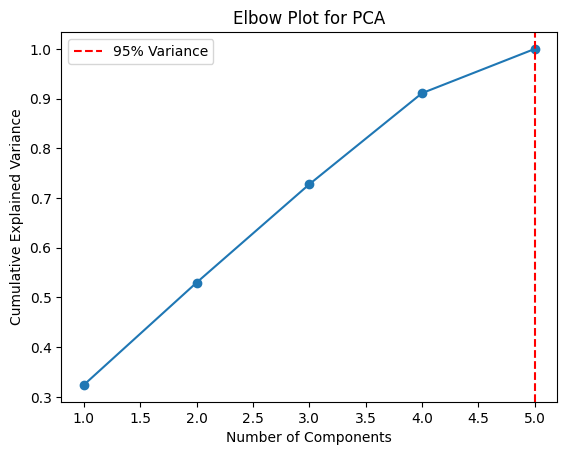

Number of PCA components to explain 95% variance: 5


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


# Select the columns for PCA analysis
columns_for_pca = ['Income', 'Recency', 'NumWebVisitsMonth', 'Complain', 'Age']

# Drop rows with missing values in the selected columns
df = df.dropna(subset=columns_for_pca)

# Standardize the selected columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[columns_for_pca])

# Handle missing values (NaN) using SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_scaled_imputed = imputer.fit_transform(df_scaled)

# Apply PCA
pca = PCA()
pca.fit(df_scaled_imputed)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Determine the number of components to explain the desired variance
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Generate elbow plot
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Plot for PCA')
plt.axvline(x=n_components, color='red', linestyle='--', label='95% Variance')
plt.legend()
plt.show()

# Print the number of components required
print("Number of PCA components to explain 95% variance:", n_components)




### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [32]:
print(df.columns)


Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'cluster_labels'],
      dtype='object')


PCA Components:
Component 1: 0.2961781484579978
Component 2: 0.09154375691211254
Component 3: 0.0886123496337519
Component 4: 0.07572001633686926
Component 5: 0.058165111892071436
Component 6: 0.045781400487426425
Component 7: 0.04475180780517902
Component 8: 0.03737161369030879


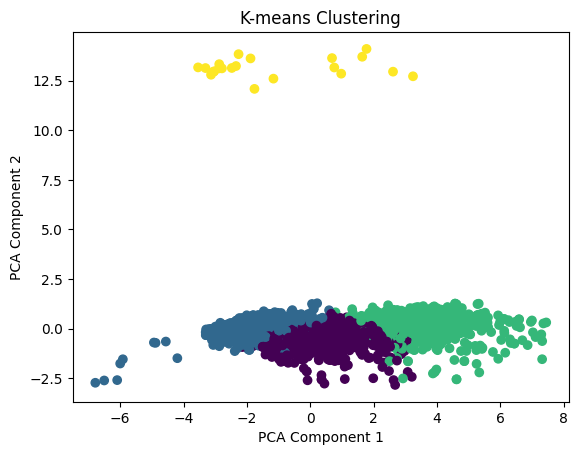

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select the columns for PCA analysis
columns_for_pca = ['Income', 'Recency', 'NumWebVisitsMonth', 'Complain', 'MntWines',
                   'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                   'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                   'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                   'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                   'AcceptedCmp2', 'Complain', 'Age']

# Drop rows with missing values in the selected columns
df = df.dropna(subset=columns_for_pca)

# Standardize the selected columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[columns_for_pca])

# Apply PCA
pca = PCA(n_components=8)  # Use all 8 components for clustering
df_pca = pca.fit_transform(df_scaled)

# Print the PCA components used
print("PCA Components:")
for i in range(pca.n_components_):
    print(f"Component {i+1}: {pca.explained_variance_ratio_[i]}")

# Apply K-means clustering
kmeans = KMeans(n_clusters=4)  # Set the number of clusters
kmeans.fit(df_pca)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the original DataFrame
df['Cluster'] = cluster_labels

# Scatter plot of PCA-transformed data with cluster labels
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering')
plt.show()


### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

In [34]:
import pandas as pd

# Load the data
df = pd.read_csv('marketing.csv')

# Print the column names
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')


In [35]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Load the data
df = pd.read_csv('marketing.csv')

# Drop 'ID' and 'Dt_Customer' columns
df = df.drop(columns=['ID', 'Dt_Customer'])

# Convert 'Year_Birth' to 'Age'
df['Age'] = 2023 - df['Year_Birth']

# Now drop the 'Year_Birth' column as it's no longer needed
df = df.drop(columns=['Year_Birth'])

# Define which columns should be encoded vs scaled
columns_to_encode = ['Education', 'Marital_Status']
columns_to_scale = [col for col in df.columns if col not in columns_to_encode]

# Instantiate encoder/scaler
scaler = StandardScaler()
ohe = OneHotEncoder(drop='first')
num_imputer = SimpleImputer(strategy='mean')  # Using mean strategy for imputation
cat_imputer = SimpleImputer(strategy='most_frequent')  # Using most_frequent strategy for imputation

# Combine the encoder/scaler to preprocess data
preprocess = ColumnTransformer(
    transformers=[
        ('impute_encode', make_pipeline(cat_imputer, ohe), columns_to_encode),
        ('impute_scale', make_pipeline(num_imputer, scaler), columns_to_scale)])

df_std = preprocess.fit_transform(df)

# Applying Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
clusters = agg_clustering.fit_predict(df_std)

# Adding cluster labels to the dataframe
df['cluster_labels'] = clusters

# Listing features and cluster labels
print("Features: ", df.columns[:-1])  # Excluding 'cluster_labels'
print("Cluster Labels: ", np.unique(clusters))

# For numerical columns, calculate the mean
numerical_cols = df.select_dtypes(include=[np.number]).columns
numeric_cluster_analysis = df[numerical_cols].groupby('cluster_labels').mean()

# For categorical columns, calculate the mode (most frequent category)
categorical_cols = df.select_dtypes(include=[object]).columns
categorical_cols_with_labels = list(categorical_cols) + ['cluster_labels']
categorical_cluster_analysis = df[categorical_cols_with_labels].groupby('cluster_labels').agg(lambda x: x.mode().iloc[0])

# Combine both dataframes for the final cluster analysis
cluster_analysis = pd.concat([numeric_cluster_analysis, categorical_cluster_analysis], axis=1)

# Printing the cluster analysis
cluster_analysis

Features:  Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age'],
      dtype='object')
Cluster Labels:  [0 1 2]


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Education,Marital_Status
cluster_labels,,,,,,,,,,,,,,,,,,,,,
0,75886.800000,0.042017,0.213445,49.346218,597.805042,65.556303,434.001681,93.966387,66.364706,76.166387,...,0.052101,0.152941,0.263866,0.240336,0.05042,0.000000,0.285714,54.904202,Graduation,Married
1,34783.228571,0.795193,0.453501,50.308255,47.125392,5.776385,26.615465,7.737722,5.459770,15.180773,...,0.003135,0.000000,0.001045,0.000000,0.00000,0.021944,0.072100,51.723093,Graduation,Married
2,56000.801762,0.303779,0.832849,47.236919,407.010174,20.905523,131.200581,30.148256,23.123547,56.340116,...,0.187500,0.110465,0.007267,0.001453,0.00000,0.000000,0.138081,57.017442,Graduation,Married


### Visualization and Interpretation of results

In [23]:
analysis = """
Cluster 0:
- Average income: $75,886.80
- Low number of kids at home and teens at home
- Average recency (time since last purchase)
- Relatively higher spending on wines, meat products, and fish products
- Moderate spending on fruits, sweet products, and gold products
- Higher acceptance rates for campaign 3, campaign 4, and campaign 5
- Older age group with an average age of 54.90
- Mostly have a graduation level of education
- Mostly married individuals

Cluster 1:
- Average income: $34,783.23
- High number of kids at home and teens at home
- Average recency (time since last purchase)
- Lower spending on wines, fruits, meat products, fish products, sweet products, and gold products
- Low acceptance rates for campaign 1 and campaign 2
- Higher complaint rates
- Average age of 51.72
- Mostly have a graduation level of education
- Mostly married individuals

Cluster 2:
- Average income: $56,000.80
- Moderate number of kids at home and high number of teens at home
- Low recency (recent purchases)
- Higher spending on wines, meat products, fish products, sweet products, and gold products
- Relatively lower acceptance rates for campaign 1, campaign 2, and campaign 5
- Lower complaint rates
- Average age of 57.02
- Mostly have a graduation level of education
- Mostly married individuals

In conclusion, the three clusters represent distinct customer segments based on their income levels, family size, recency of purchases, spending patterns, responsiveness to marketing campaigns, and demographic characteristics. Cluster 0 represents affluent and older customers who are more responsive to campaigns. Cluster 1 consists of customers with lower income levels, larger family sizes, and lower spending. Cluster 2 represents customers with moderate income levels, moderate family sizes, and higher spending on various product categories. These insights can be valuable for targeted marketing strategies and personalized customer engagement based on specific cluster characteristics.
"""

print(analysis)



Cluster 0:
- Average income: $75,886.80
- Low number of kids at home and teens at home
- Average recency (time since last purchase)
- Relatively higher spending on wines, meat products, and fish products
- Moderate spending on fruits, sweet products, and gold products
- Higher acceptance rates for campaign 3, campaign 4, and campaign 5
- Older age group with an average age of 54.90
- Mostly have a graduation level of education
- Mostly married individuals

Cluster 1:
- Average income: $34,783.23
- High number of kids at home and teens at home
- Average recency (time since last purchase)
- Lower spending on wines, fruits, meat products, fish products, sweet products, and gold products
- Low acceptance rates for campaign 1 and campaign 2
- Higher complaint rates
- Average age of 51.72
- Mostly have a graduation level of education
- Mostly married individuals

Cluster 2:
- Average income: $56,000.80
- Moderate number of kids at home and high number of teens at home
- Low recency (recent 

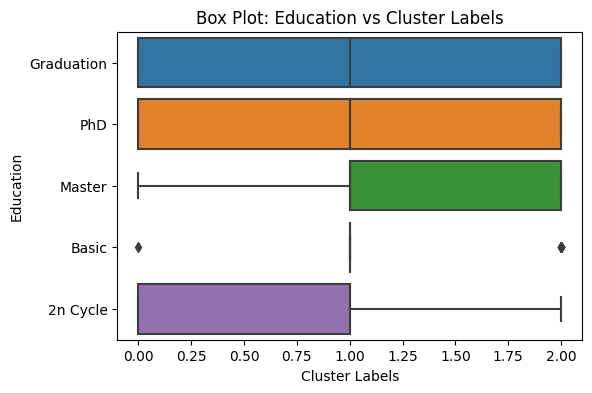

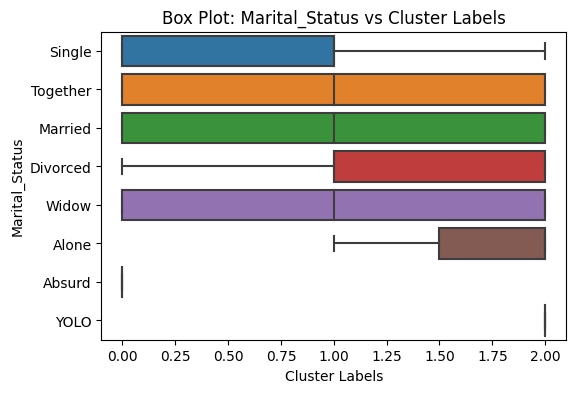

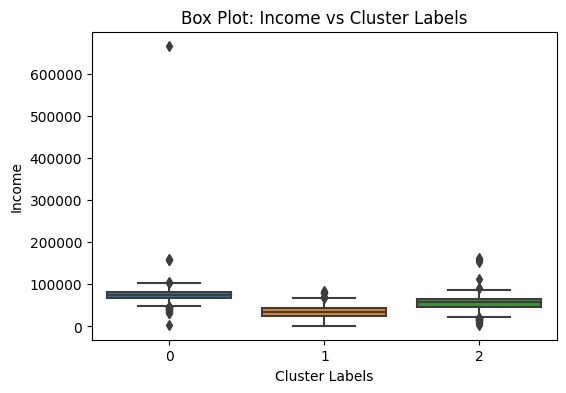

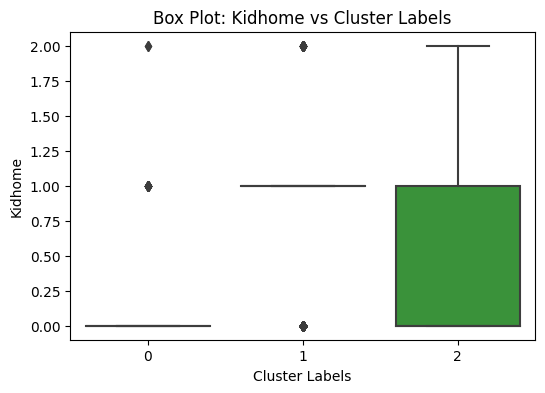

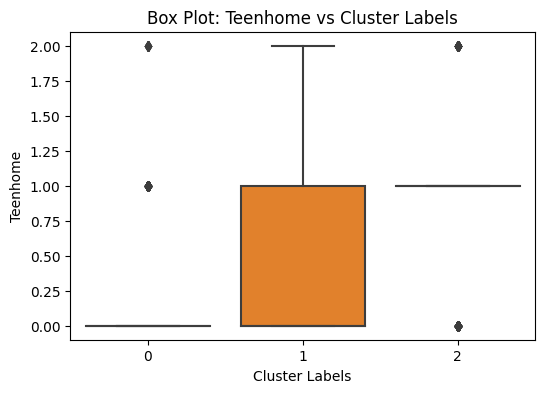

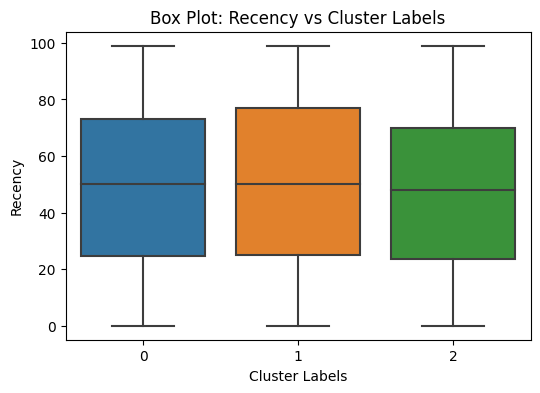

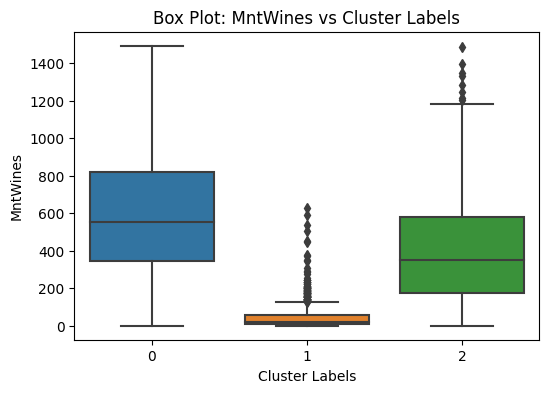

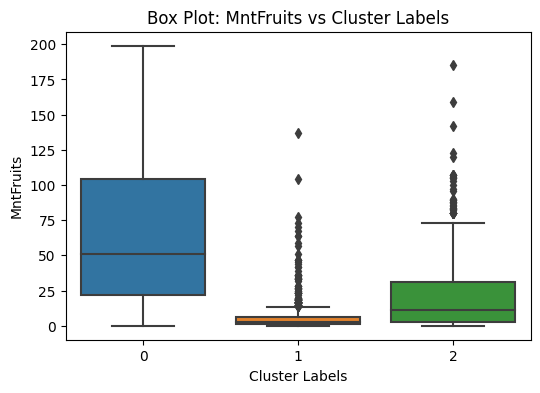

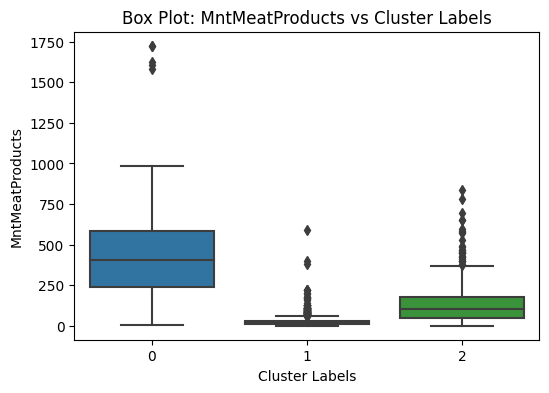

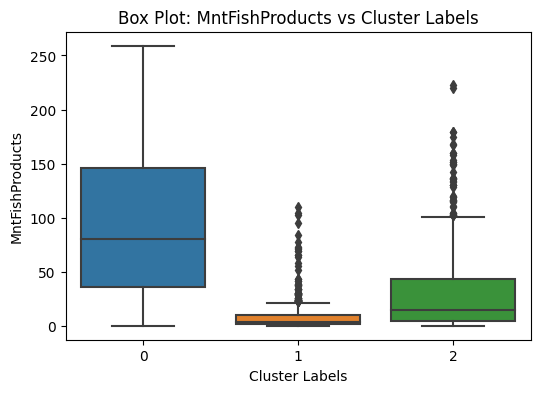

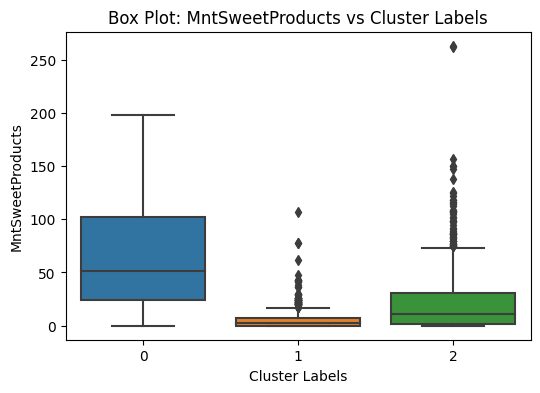

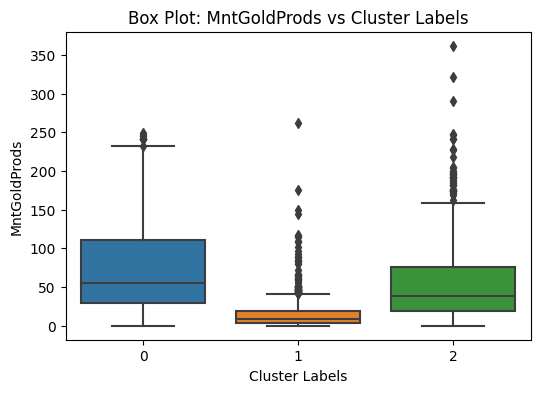

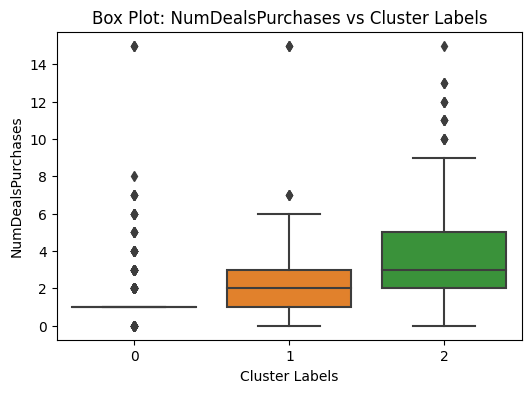

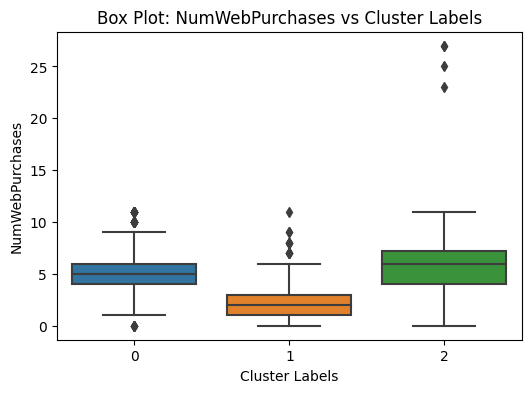

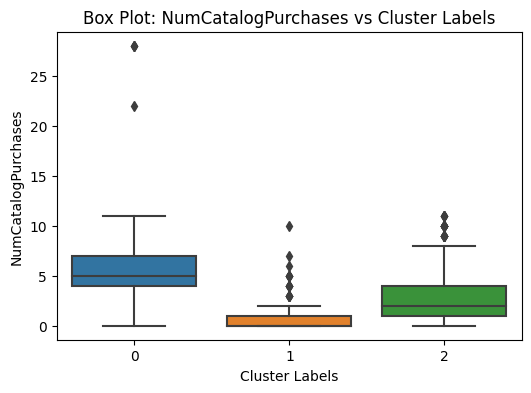

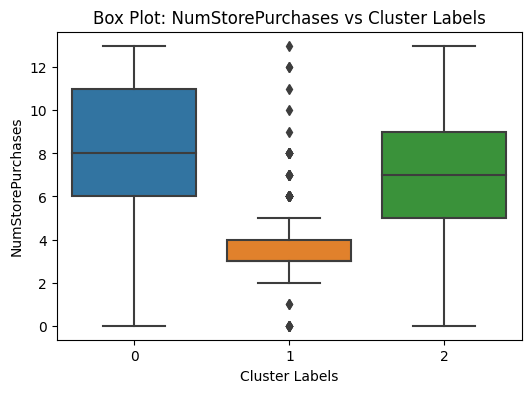

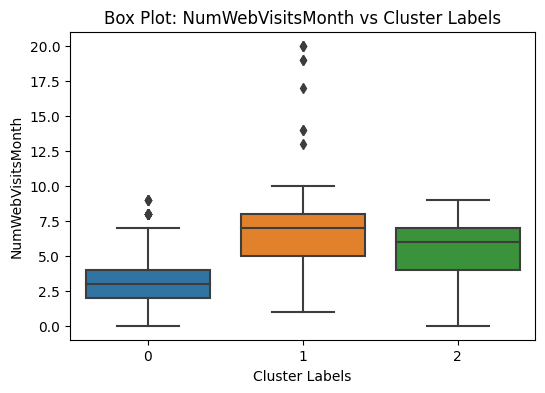

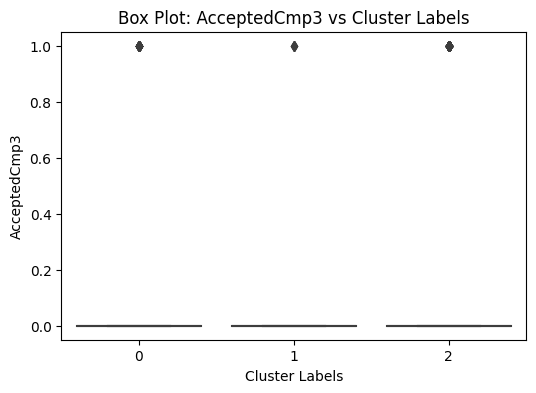

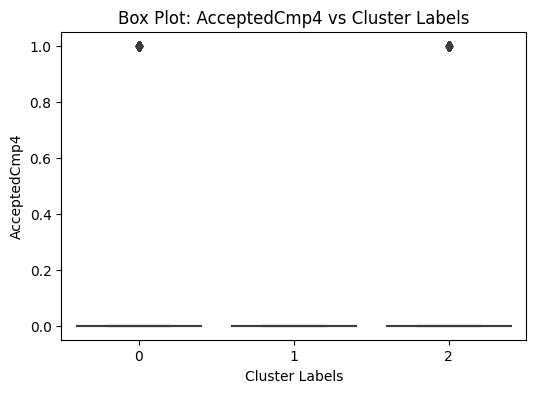

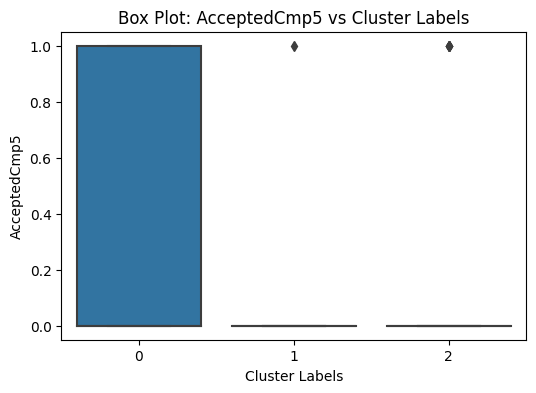

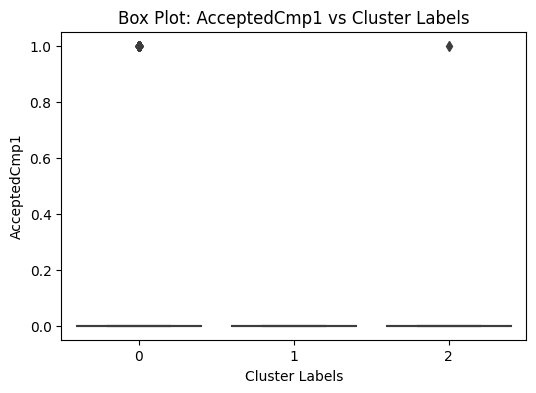

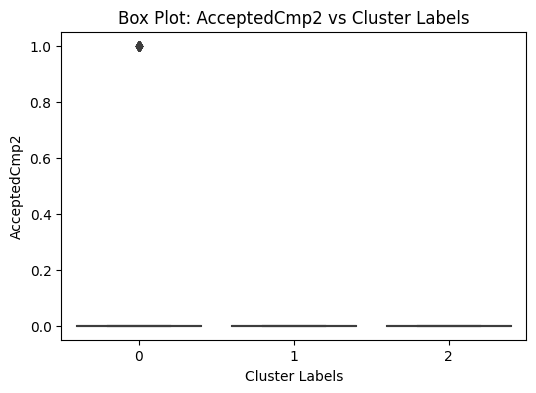

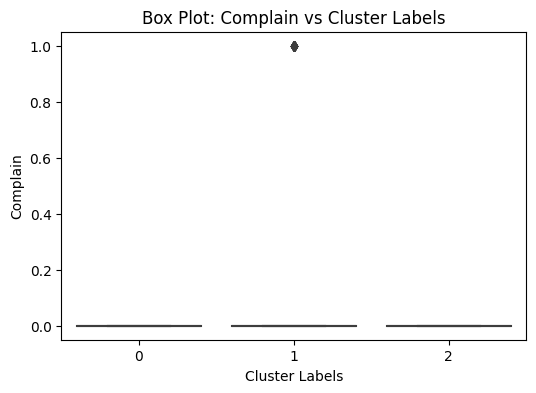

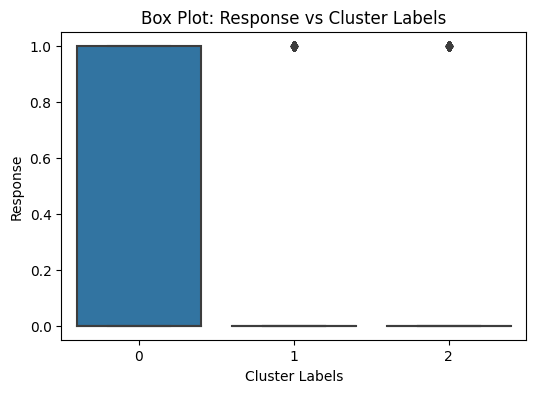

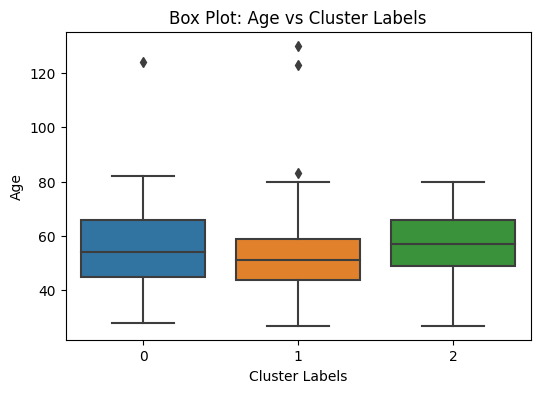

In [24]:

# Box plot for continuous features
for i in range(df.shape[1] - 1):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='cluster_labels', y=df.columns[i], data=df)
    plt.xlabel('Cluster Labels')
    plt.ylabel(df.columns[i])
    plt.title(f"Box Plot: {df.columns[i]} vs Cluster Labels")
    plt.show()

-----
## Happy Learning
-----